# Data Science - Tools and Programming Languages for Data Science WiSe 23/24 TASK 1
İREM BOLAT & BATUHAN GÜNDÜZ

In [1]:
# Using the following libraries and models to perform operations such as data analysis, visualization and pulling data from external sources in our task.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re
import requests
import os
import warnings


In [2]:
# Reading data from the files

# athletes.txt : Biographic information of athletes(e.g. the name and sex)
# games.tsv : Basic information about the Olympic Games(e.g. the location and opening dates)
# results.csv : Information about individual results of athletes in the Olympic Games since 2012: Which athlete participated in which Games, sports and disciplines, achieving which position?

# delimiter=' Specifies the character used to separate columns in the CSV file. For athletes.txt file, we used ';' because columns separated by ';'.
# delimiter='\t' parameter is used to read tab-delimited files such as games.tsv.

# If the columns of the file are separated by a different character and this character is not a comma, it is necessary to specify the delimiter parameter
# In the content of the 'results.csv' file, the columns are separated by commas (,), so we did not use delimiters.

#We specified it with header = 0 because it is generally a good practice to specify header = 0 to make the codes more readable and understandable.

athletes = pd.read_csv('athletes.txt',delimiter=';',header=0)
games=pd.read_csv('games.tsv',delimiter='\t',header=0)
results=pd.read_csv('results.csv', header=0)


In [3]:
# .info() displays the names of the columns in the data frame, the number of filled (non-null) values in each column, and the data types of the columns.
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141856 entries, 0 to 141855
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete       141856 non-null  float64
 1   name          141856 non-null  object 
 2   sex           141856 non-null  object 
 3   born          139934 non-null  object 
 4   died          29702 non-null   object 
 5   affiliations  90611 non-null   object 
 6   title         360 non-null     object 
 7   measurements  105564 non-null  object 
dtypes: float64(1), object(7)
memory usage: 8.7+ MB


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           63 non-null     int64 
 1   season         63 non-null     object
 2   games_city     63 non-null     object
 3   games_country  63 non-null     object
 4   games_opened   52 non-null     object
 5   games_closed   50 non-null     object
 6   games_remark   5 non-null      object
dtypes: int64(1), object(6)
memory usage: 3.6+ KB


In [5]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50822 entries, 0 to 50821
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   athlete       50822 non-null  int64  
 1   year          50822 non-null  int64  
 2   season        50822 non-null  object 
 3   sport         50822 non-null  object 
 4   discipline    50822 non-null  object 
 5   pos           42891 non-null  float64
 6   medal         7487 non-null   object 
 7   country       50822 non-null  object 
 8   country_code  50822 non-null  object 
 9   team          20569 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.9+ MB


In [6]:
results

,athlete,year,season,sport,discipline,pos,medal,country,country_code,team
0,1014,2020,Summer,Table Tennis,"Singles, Women",65.0,NaN,Nigeria,NGR,NaN
1,2069,2020,Summer,Archery,"Team, Mixed",24.0,NaN,Poland,POL,Sylwia Zyzańska
2,2069,2020,Summer,Archery,"Individual, Men",33.0,NaN,Poland,POL,NaN
3,11260,2020,Summer,Equestrian Jumping,"Individual, Open",5.0,NaN,Sweden,SWE,NaN
4,11260,2020,Summer,Equestrian Jumping,"Team, Open",1.0,Gold,Sweden,SWE,Sweden
...,...,...,...,...,...,...,...,...,...,...
50817,134351,2012,Summer,Football,"Football, Men",NaN,NaN,Honduras,HON,Honduras
50818,134442,2012,Summer,Hockey,"Hockey, Men",NaN,NaN,India,IND,India
50819,135372,2012,Summer,Hockey,"Hockey, Men",NaN,NaN,New Zealand,NZL,New Zealand
50820,135926,2012,Summer,Athletics,"400 metres Hurdles, Men",NaN,NaN,Switzerland,SUI,NaN


# Exercise 1

In [7]:
# Merge
# on=["athlete"] : Specifies the common column name to use in the join operation.
# how="left": Since it is set to "left", all rows in the results data frame, which is the left data frame, are preserved. 
# If there is no matching value in the athlete column, the columns from the athletes data frame receive the value NaN (Not a Number).
merge_athlete_results=pd.merge(left=results,right=athletes,on=["athlete"],how="left")
merge_athlete_results

,athlete,year,season,sport,discipline,pos,medal,country,country_code,team,name,sex,born,died,affiliations,title,measurements
0,1014,2020,Summer,Table Tennis,"Singles, Women",65.0,NaN,Nigeria,NGR,NaN,Funke•Oshonaike,Female,28 October 1975 in Lagos (NGR),NaN,"Sports Club Poppenbüttel III, Hamburg, GER",NaN,167 cm / 59 kg
1,2069,2020,Summer,Archery,"Team, Mixed",24.0,NaN,Poland,POL,Sylwia Zyzańska,Sławomir•Napłoszek,Male,"29 July 1968 in Warszawa (Warsaw), Mazowieckie...",NaN,"Marymont Warszawa, Warszawa (POL)",NaN,185 cm / 82 kg
2,2069,2020,Summer,Archery,"Individual, Men",33.0,NaN,Poland,POL,NaN,Sławomir•Napłoszek,Male,"29 July 1968 in Warszawa (Warsaw), Mazowieckie...",NaN,"Marymont Warszawa, Warszawa (POL)",NaN,185 cm / 82 kg
3,11260,2020,Summer,Equestrian Jumping,"Individual, Open",5.0,NaN,Sweden,SWE,NaN,Malin•Baryard-Johnsson,Female,10 April 1975 in Söderköping (SWE),NaN,"Söderköpings RS, Söderköping (SWE)",NaN,172 cm / 52 kg
4,11260,2020,Summer,Equestrian Jumping,"Team, Open",1.0,Gold,Sweden,SWE,Sweden,Malin•Baryard-Johnsson,Female,10 April 1975 in Söderköping (SWE),NaN,"Söderköpings RS, Söderköping (SWE)",NaN,172 cm / 52 kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50817,134351,2012,Summer,Football,"Football, Men",NaN,NaN,Honduras,HON,Honduras,Romell•Quioto,Male,9 August 1991 in Balfate (HON),NaN,"CDS Vida, La Ceiba (HON) / CD Olimpia, Tegucig...",NaN,180 cm / 86 kg
50818,134442,2012,Summer,Hockey,"Hockey, Men",NaN,NaN,India,IND,India,Kothajit•Singh,Male,"17 August 1992 in Imphal, Manipur (IND)",NaN,Indian Oil Corporation [IOC] [India],NaN,170 cm / 63 kg
50819,135372,2012,Summer,Hockey,"Hockey, Men",NaN,NaN,New Zealand,NZL,New Zealand,Arun•Panchia,Male,22 April 1989 in Auckland (NZL),NaN,Auckland [New Zealand],NaN,180 cm / 73 kg
50820,135926,2012,Summer,Athletics,"400 metres Hurdles, Men",NaN,NaN,Switzerland,SUI,NaN,Kariem•Hussein,Male,4 January 1989 in Münsterlingen (SUI),NaN,"LC Zürich, Zürich (SUI)",NaN,191 cm / 77 kg


In [8]:
# Merge
# on= ['year','season'] : Specifies the common column name to use in the join operation.
# how="outer" : Preserves all rows present in both dataframes. If there is no matching value in the year and season columns, it is filled as missing data (NaN).
merge_all=pd.merge(merge_athlete_results,right=games,on=['year','season'],how="outer")
# Saving merge_all DataFrame as CSV file
# We used the index=False parameter because we did not want the row numbers in the data frame to be written to the CSV file:
merge_all.to_csv("merge_all.csv", index=False)
merge_all

,athlete,year,season,sport,discipline,pos,medal,country,country_code,team,...,born,died,affiliations,title,measurements,games_city,games_country,games_opened,games_closed,games_remark
0,1014.0,2020,Summer,Table Tennis,"Singles, Women",65.0,NaN,Nigeria,NGR,NaN,...,28 October 1975 in Lagos (NGR),NaN,"Sports Club Poppenbüttel III, Hamburg, GER",NaN,167 cm / 59 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
1,2069.0,2020,Summer,Archery,"Team, Mixed",24.0,NaN,Poland,POL,Sylwia Zyzańska,...,"29 July 1968 in Warszawa (Warsaw), Mazowieckie...",NaN,"Marymont Warszawa, Warszawa (POL)",NaN,185 cm / 82 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
2,2069.0,2020,Summer,Archery,"Individual, Men",33.0,NaN,Poland,POL,NaN,...,"29 July 1968 in Warszawa (Warsaw), Mazowieckie...",NaN,"Marymont Warszawa, Warszawa (POL)",NaN,185 cm / 82 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
3,11260.0,2020,Summer,Equestrian Jumping,"Individual, Open",5.0,NaN,Sweden,SWE,NaN,...,10 April 1975 in Söderköping (SWE),NaN,"Söderköpings RS, Söderköping (SWE)",NaN,172 cm / 52 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
4,11260.0,2020,Summer,Equestrian Jumping,"Team, Open",1.0,Gold,Sweden,SWE,Sweden,...,10 April 1975 in Söderköping (SWE),NaN,"Söderköpings RS, Söderköping (SWE)",NaN,172 cm / 52 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,NaN,2022,Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Beijing,People's Republic of China,NaN,NaN,NaN
50876,NaN,2024,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Paris,France,NaN,NaN,NaN
50877,NaN,2026,Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Milano-Cortina d'Ampezzo,Italy,NaN,NaN,NaN
50878,NaN,2028,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Los Angeles,United States,NaN,NaN,NaN


In [9]:
# The gold_medals data frame contains information about athletes who won gold medals and the Olympic games.
gold_medals=merge_all[merge_all['medal']== 'Gold']
gold_medals

,athlete,year,season,sport,discipline,pos,medal,country,country_code,team,...,born,died,affiliations,title,measurements,games_city,games_country,games_opened,games_closed,games_remark
4,11260.0,2020,Summer,Equestrian Jumping,"Team, Open",1.0,Gold,Sweden,SWE,Sweden,...,10 April 1975 in Söderköping (SWE),NaN,"Söderköpings RS, Söderköping (SWE)",NaN,172 cm / 52 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
11,11503.0,2020,Summer,Equestrian Dressage,"Team, Open",1.0,Gold,Germany,GER,Bella Rose 2 / Germany,...,"21 July 1969 in Sevelen, Issum, Nordrhein-West...",NaN,"RFV ""Graf von Schmettow"", Rheinberg (GER)",NaN,169 cm / 66 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
12,11609.0,2020,Summer,Equestrian Jumping,"Team, Open",NaN,Gold,Sweden,SWE,Sweden,...,2 June 1962 in Lund (SWE),NaN,"Flyinge RF, Södra Sandby, Lund (SWE)",NaN,171 cm / 67 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
17,11981.0,2020,Summer,Equestrian Jumping,"Team, Open",1.0,Gold,Sweden,SWE,Sweden,...,30 January 1972 in Flen (SWE),NaN,"Flyinge RF, Södra Sandby, Lund (SWE) / Bolleru...",NaN,189 cm / 80 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
59,90189.0,2020,Summer,Canoe Sprint,"Kayak Fours, 500 metres, Men",1.0,Gold,Germany,GER,Germany,...,"3 October 1981 in West-Berlin, Berlin (GER)",NaN,"RKV Berlin, Berlin (GER) / KC Potsdam, Potsdam...",NaN,179 cm / 82 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50634,127104.0,2012,Summer,Swimming,"4 × 200 metres Freestyle Relay, Women",1.0,Gold,United States,USA,United States,...,"15 November 1991 in St. Louis, Missouri (USA)",NaN,"Athens Bulldog Swim Club, Hull, Georgia (USA)",NaN,188 cm / 79 kg,London,Great Britain,2012-07-27,2012-08-12,NaN
50681,127150.0,2012,Summer,Artistic Gymnastics,"Team All-Around, Men",1.0,Gold,People's Republic of China,CHN,People's Republic of China,...,"1 February 1988 in ?, Guangdong (CHN)",NaN,NaN,NaN,160 cm / 52 kg,London,Great Britain,2012-07-27,2012-08-12,NaN
50751,127204.0,2012,Summer,Fencing,"Foil, Team, Men",1.0,Gold,Italy,ITA,Italy,...,"8 May 1989 in Modica, Ragusa, Ragusa (ITA)",NaN,"G.S. Fiamme Gialle, Roma (ITA)",NaN,178 cm / 72 kg,London,Great Britain,2012-07-27,2012-08-12,NaN
50763,127217.0,2012,Summer,Fencing,"Épée, Team, Women",1.0,Gold,People's Republic of China,CHN,People's Republic of China,...,"23 January 1992 in Nanjing, Jiangsu (CHN)",NaN,NaN,NaN,182 cm / 76 kg,London,Great Britain,2012-07-27,2012-08-12,NaN


In [10]:
# This checks for missing values (NaN) in any column in the data frame.
gold_medals.isnull().any()
gold_medals


,athlete,year,season,sport,discipline,pos,medal,country,country_code,team,...,born,died,affiliations,title,measurements,games_city,games_country,games_opened,games_closed,games_remark
4,11260.0,2020,Summer,Equestrian Jumping,"Team, Open",1.0,Gold,Sweden,SWE,Sweden,...,10 April 1975 in Söderköping (SWE),NaN,"Söderköpings RS, Söderköping (SWE)",NaN,172 cm / 52 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
11,11503.0,2020,Summer,Equestrian Dressage,"Team, Open",1.0,Gold,Germany,GER,Bella Rose 2 / Germany,...,"21 July 1969 in Sevelen, Issum, Nordrhein-West...",NaN,"RFV ""Graf von Schmettow"", Rheinberg (GER)",NaN,169 cm / 66 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
12,11609.0,2020,Summer,Equestrian Jumping,"Team, Open",NaN,Gold,Sweden,SWE,Sweden,...,2 June 1962 in Lund (SWE),NaN,"Flyinge RF, Södra Sandby, Lund (SWE)",NaN,171 cm / 67 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
17,11981.0,2020,Summer,Equestrian Jumping,"Team, Open",1.0,Gold,Sweden,SWE,Sweden,...,30 January 1972 in Flen (SWE),NaN,"Flyinge RF, Södra Sandby, Lund (SWE) / Bolleru...",NaN,189 cm / 80 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
59,90189.0,2020,Summer,Canoe Sprint,"Kayak Fours, 500 metres, Men",1.0,Gold,Germany,GER,Germany,...,"3 October 1981 in West-Berlin, Berlin (GER)",NaN,"RKV Berlin, Berlin (GER) / KC Potsdam, Potsdam...",NaN,179 cm / 82 kg,Tokyo,Japan,2021-07-23,2021-08-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50634,127104.0,2012,Summer,Swimming,"4 × 200 metres Freestyle Relay, Women",1.0,Gold,United States,USA,United States,...,"15 November 1991 in St. Louis, Missouri (USA)",NaN,"Athens Bulldog Swim Club, Hull, Georgia (USA)",NaN,188 cm / 79 kg,London,Great Britain,2012-07-27,2012-08-12,NaN
50681,127150.0,2012,Summer,Artistic Gymnastics,"Team All-Around, Men",1.0,Gold,People's Republic of China,CHN,People's Republic of China,...,"1 February 1988 in ?, Guangdong (CHN)",NaN,NaN,NaN,160 cm / 52 kg,London,Great Britain,2012-07-27,2012-08-12,NaN
50751,127204.0,2012,Summer,Fencing,"Foil, Team, Men",1.0,Gold,Italy,ITA,Italy,...,"8 May 1989 in Modica, Ragusa, Ragusa (ITA)",NaN,"G.S. Fiamme Gialle, Roma (ITA)",NaN,178 cm / 72 kg,London,Great Britain,2012-07-27,2012-08-12,NaN
50763,127217.0,2012,Summer,Fencing,"Épée, Team, Women",1.0,Gold,People's Republic of China,CHN,People's Republic of China,...,"23 January 1992 in Nanjing, Jiangsu (CHN)",NaN,NaN,NaN,182 cm / 76 kg,London,Great Britain,2012-07-27,2012-08-12,NaN



• What is the name of the most successful athlete since 2012, as measured by the number of gold
medals?



In [11]:
year_2012=merge_all[merge_all['year']>=2012]
gold_counts=gold_medals['athlete'].value_counts()

# gold_counts.idxmax() finds the index (athlete ID) with the highest value in the gold_counts Series. It finds the identity (value in the athlete column) of the athlete who has won the most gold medals.
most_successful_athlete_id=gold_counts.idxmax()
# values[0] : Only one value is returned for the athlete who won the most gold medals.
most_successful_athlete_name = merge_all[merge_all['athlete'] == most_successful_athlete_id]['name'].values[0]
most_successful_athlete_name




'Michael•Phelps'

• How many different athletes have participates in the Olympic Games since 2012?


In [12]:
# .nunique():returns the number of distinct (unique) values in the selected column (here "athlete").Itit counts how many different athlete identities ("athlete") there are.
dif_ath=year_2012['athlete'].nunique()
dif_ath

29655

• What are the 10 countries with the lowest ratio of female participants? Represent this information using a bar chart.

In [13]:
# normalize=True : Calculates the number of values in the "sex" column and returns the proportion of each value in the total.
group_sex_country=merge_all.groupby('country')['sex'].value_counts(normalize=True)
# unstack() : each country and gender combination is separated into columns.
# fillna(0) : we used this to fill NaN values in a data frame with zeros.
fem_rat=group_sex_country.unstack().fillna(0)['Female'].sort_values(ascending=True)# sorting with the increasing values
fem_part=fem_rat.head(10)


In [14]:
low_fem=fem_part.nsmallest(10) # To show smallest 10 values 
low_fem

country
Honduras                       0.080000
Iraq                           0.100000
Saint Kitts and Nevis          0.105263
Kingdom of Saudi Arabia        0.106061
Qatar                          0.135135
United Arab Emirates           0.136364
Individual Olympic Athletes    0.142857
Vanuatu                        0.166667
Nauru                          0.166667
Eritrea                        0.170732
Name: Female, dtype: float64

c:\Users\irem\envs\ds-tap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irem\envs\ds-tap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irem\envs\ds-tap\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


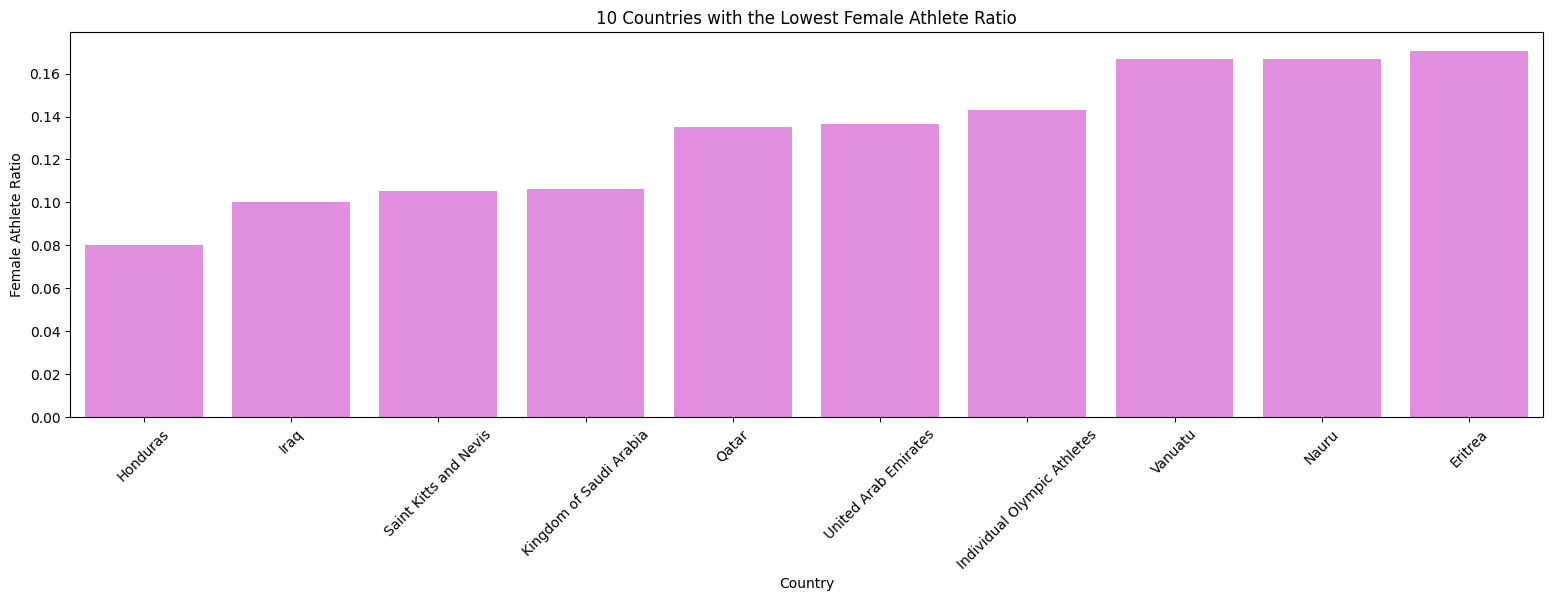

In [15]:
# Represent this information using a bar chart.
plt.figure(figsize=(19, 5)) # width and height of the figure
sns.barplot(x=low_fem.index, y=low_fem.values, color='violet') # low_fem.index = country, low_fem.values = female athlete ratio
plt.xlabel('Country')
plt.ylabel('Female Athlete Ratio')
plt.title('10 Countries with the Lowest Female Athlete Ratio')
plt.xticks(rotation=45)
plt.show()


# Exercise 2

What are the three most common firstnames of female athletes from the country ‘Republic of
Korea'?


In [16]:
merge_all = merge_all.copy() # ensures that the original DataFrame is not modified and avoids the "SettingWithCopyWarning" warning.
#Adding a new 'first_name' column to the data frame. This column separates the first word from the values (names) in the 'name' column using regex (regular expression) and contains these values. 
#\w+ matches words that contain at least one letter or number:
merge_all['first_name'] = merge_all['name'].str.extract(r'(\w+)')
# The expression (\w+-\w+$) matches words that contain at least one letter or number, with the last two words separated by a hyphen:
merge_all['last_name'] = merge_all['name'].str.extract(r'(\w+-\w+$)')


korean_fem=merge_all[(merge_all['country']=='Republic of Korea')&(merge_all['sex']=='Female')] 
# Creates a Series containing the top 3 most common names by counting the number of values in the 'last_name' column:
korean_firstnames=korean_fem['last_name'].value_counts().head(3)
korean_firstnames_df=pd.DataFrame({'Most 3 Common Names': korean_firstnames.index,'count':korean_firstnames})
korean_firstnames_df


,Most 3 Common Names,count
last_name,,
Hye-Jin,Hye-Jin,12
Ji-Hui,Ji-Hui,10
Ji-Yeon,Ji-Yeon,9


Who is the tallest female athlete? Provide the name, height, country and sport.


In [17]:
# All non-digit characters (i.e. characters that are not numbers) in the values in the 'measurements' column are cleared using regex, 
# and then the cleared values are converted to numbers (pd.to_numeric()) and added to the 'height' column:
merge_all['height'] = pd.to_numeric(merge_all['measurements'].str.replace(r'\D+', '', regex=True))
# Among the values in the 'measurements' column, it extracts the values between numbers and "cm" with regex, and then these values are converted to 
# numbers (pd.to_numeric()) and added to the 'height' column.This expression clears the spaces and retrieves only height information in centimeters:
merge_all['height'] = pd.to_numeric(merge_all['measurements'].str.extract(r'(\d+) cm', expand=False))
merge_all['weight'] = pd.to_numeric(merge_all['measurements'].str.extract(r'(\d+) kg', expand=False))
female_athletes = merge_all[merge_all['sex'] == 'Female']
tallest_female = female_athletes[["name", "height", "country", "sport"]][female_athletes['height'] == female_athletes['height'].max()]
tallest_female
merge_all['height']

0        167.0
1        185.0
2        185.0
3        172.0
4        172.0
         ...  
50875      NaN
50876      NaN
50877      NaN
50878      NaN
50879      NaN
Name: height, Length: 50880, dtype: float64

•What are the 10 sports with the highest average weight of participants? Provide the sport and the weight.


In [18]:
# These codes form a data frame that shows the average weight of participants in each sport and highlights the sports with the highest average weight.
sport_weight=merge_all[['sport','weight']]
avg_weight=sport_weight.groupby('sport')['weight'].mean()
avg_weight_df=avg_weight.reset_index()
avg_weight_df=avg_weight_df.sort_values(by='weight',ascending=False) #sorting with the decreasing values
avg_weight_df


,sport,weight
11,Bobsleigh,93.904545
0,3x3 Basketball,90.500000
8,Basketball,87.092564
7,Baseball,86.666667
61,Water Polo,85.910632
...,...,...
4,Artistic Swimming,55.783217
40,Rhythmic Gymnastics,50.775000
17,Cycling BMX Freestyle,NaN
35,Karate,NaN


In [19]:
# This DataFrame contains the top 10 sports with the highest average weight and their average weights.
highest_weight_10=avg_weight.nlargest(10)
highest_weight_10_df=highest_weight_10.reset_index()
highest_weight_10_df

,sport,weight
0,Bobsleigh,93.904545
1,3x3 Basketball,90.500000
2,Basketball,87.092564
3,Baseball,86.666667
4,Water Polo,85.910632
5,Handball,82.876325
6,Luge,81.003145
7,Rowing,80.387898
8,Volleyball,80.311239
9,Ice Hockey,80.188865


•What are the 3 sports with the largest number of participants that are severely underweight? Provide the sport and the number of severely underweight participants. Severe underweight is defined by a body-mass-index (BMI) smaller than 16, where BMI is calculate as weight/height2 in the unit kg/m2.

In [20]:
# Assuming the values in the 'height' column are in millimeters, it converts them to meters. That is, it converts height to meters:
merge_all['height'] = merge_all['height'] / 100 

# In this row, we calculated BMI (Body Mass Index). The formula for calculating BMI is weight in kilograms divided by the square of height (in meters), 
# which we calculated with the expression (merge_all['height'] ** 2):
merge_all['bmi'] = merge_all['weight'] / (merge_all['height'] ** 2)

# In this row, it marks those with a BMI less than 16 as 'Severely Underweight' and adds this information to the 'weight_status' column.
merge_all.loc[merge_all['bmi'] < 16, 'weight_status'] = 'Severely Underweight'
merge_all['weight_status'] = merge_all['weight_status'].astype('str') # provides a convenient solution to avoid errors that can result from incompatible data types.
underweight = merge_all[merge_all['weight_status'] == 'Severely Underweight']

# In the 'underweight' data frame, we calculated the number of participants who were 'Severely Underweight', grouped by sport, and ranked these values 
# from largest to smallest. We then selected the 3 largest values (i.e. the 3 sports with the most severely underweight participants):
three_sports = underweight['sport'].value_counts().nlargest(3)
three_sports_df=three_sports.reset_index()
three_sports_df.columns=['Sport','Underweight']
three_sports_df

C:\Users\irem\AppData\Local\Temp\ipykernel_28872\2735419597.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Severely Underweight' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merge_all.loc[merge_all['bmi'] < 16, 'weight_status'] = 'Severely Underweight'


,Sport,Underweight
0,Athletics,14
1,Rhythmic Gymnastics,8
2,Artistic Gymnastics,7


# Exercise 3



For the following two questions you need to calculate the age of particantants. We define age as the
number of completed years at the beginning of the Olympic Games at which the athlete participates.

To calculate the age you need to (1) leverage the information about the date of birth and you (2) need
to consider the date when the Olympic Games were opened.




•Who is the oldest athlete? Provide the name and the age.

In [21]:
# Converts the date data in the 'games_opened' column to an appropriate datetime data type. The 'games_opened' column contains the start dates of the Olympic Games:
merge_all['games_opened'] = pd.to_datetime(merge_all['games_opened'], format='%Y-%m-%d')
merge_all['games_opened']
# Regex extracts the day, month and year from the date data in the 'born' column. This expression organizes the format of birth dates:
merge_all['born'] = merge_all['born'].str.extract(r'(\d{1,2}\s\w+\s\d{4})')
merge_all['born'] = pd.to_datetime(merge_all['born'],format="%d %B %Y")
# In this row, we calculated the ages of the participants. We calculated the difference between the date the Olympic Games opened and the date of birth in days and then 
# converted it to years. Thus, the ages of the participants were calculated:
merge_all['age'] = (merge_all['games_opened'] - merge_all['born']).dt.days // 365
oldest_athlete = merge_all[merge_all['age'] == merge_all['age'].max()]
oldest_athlete

,athlete,year,season,sport,discipline,pos,medal,country,country_code,team,...,games_opened,games_closed,games_remark,first_name,last_name,height,weight,bmi,weight_status,age
37904,12128.0,2012,Summer,Equestrian Dressage,"Individual, Open",41.0,NaN,Japan,JPN,Whisper,...,2012-07-27,2012-08-12,NaN,Hiroshi,NaN,1.68,62.0,21.96712,nan,71.0


In [22]:
# A DataFrame containing the name and age of the oldest participant:
oldest_athlete[['name','age']]

,name,age
37904,Hiroshi•Hoketsu,71.0


•What are the 10 sports with the highest average age of participants? Provide the sport and the average age.

In [23]:
# In this row, it removes rows with NaN (empty) values in the 'age' column from the data frame. This eliminates participants with no age information:
merge_all = merge_all.dropna(subset=['age'])
average_age_by_sport = merge_all.groupby('sport')['age'].mean().reset_index()
sorted_sports = average_age_by_sport.sort_values(by='age', ascending=False)
top_10_sports = sorted_sports.head(10)
top_10_sports

,sport,age
25,Equestrian Jumping,38.510896
23,Equestrian Dressage,38.192568
24,Equestrian Eventing,37.089431
44,Shooting,30.950299
16,Curling,29.512438
9,Beach Volleyball,29.460714
7,Baseball,29.393333
30,Golf,28.965957
20,Cycling Road,28.675472
11,Bobsleigh,28.548753


# Exercise 4

Calculate the medal table for the Summer Olympic Games 2016 in Rio de Janeiro. See the official medal table as a reference. Your medal table should have the same structure (same column names and same sorting) as the official medal table. Display the top 10 countries.

Hint: In team events such as Basketball, all team members of the winning team receive a gold medal, but for the medal table it should only count as one gold medal. The same logic also applies to silver and bronze medals. You can recognize team events either by the fact that multiple particantants have won
the same medal in one event event (combination of sport and discipline), or via the column team (which
is then non-missing).



In [24]:
# In this row, we have created a DataFrame named rio_olympic that contains the data participating in the 2016 Rio Summer Olympics:
rio_olympic = merge_all[(merge_all['year'] == 2016) & (merge_all['games_city'] == 'Rio de Janeiro')]

# In this row, we created a DataFrame that counts the medals won in team events:
team_events = rio_olympic.groupby(['country', 'sport', 'discipline', 'medal'])['team'].count().reset_index()

# In this row, we have created a DataFrame that counts the medals won in individual events:
individual_events = rio_olympic.drop_duplicates(subset=['country', 'sport', 'discipline', 'medal'])

# We created a DataFrame containing the number of different types of medals (gold, silver, bronze) won by each country:
# If a country has not won a medal of a certain type, this value is filled as 0 (fill_value=0).
medals_country = team_events.groupby('country')['medal'].value_counts().unstack(fill_value=0).reset_index()

# In this row, we have created a DataFrame sorted by the medals won by the countries:
medals_country['Total'] = medals_country['Gold'] + medals_country['Silver'] + medals_country['Bronze']
individual_medals_country = individual_events.groupby('country')['medal'].value_counts().unstack(fill_value=0).reset_index()
individual_medals_country['Total'] = individual_medals_country['Gold'] + individual_medals_country['Silver'] + individual_medals_country['Bronze']
team_medal_table = medals_country.sort_values(by=['Gold', 'Silver', 'Bronze', 'Total'], ascending=[False, False, False, True])

 
team_medal_table.columns.name = None #  In this line, we cleared the name of the column index (columns) of the team_medal_table DataFrame. This made the DataFrame more readable.
team_medal_table = team_medal_table.rename(columns={'country': 'NOC'})
order = ['NOC', 'Gold', 'Silver', 'Bronze', 'Total']

#In this row, we created a new column called Rank and assigned it values starting from 1 and increasing by the number of rows of the medals_country DataFrame (i.e. the number of countries). 
#This represents the ordinal numbers by which the countries are ranked:
team_medal_table['Rank'] = range(1,  len(medals_country) + 1)
team_medal_table.set_index('Rank',inplace=True)
medal_table_sort=team_medal_table[order]

top_country_medal=medal_table_sort.head(10)
top_country_medal



,NOC,Gold,Silver,Bronze,Total
Rank,,,,,
1,United States,46,37,38,121
2,Great Britain,27,23,17,67
3,People's Republic of China,26,18,26,70
4,Russian Federation,19,17,20,56
5,Germany,17,10,15,42
6,Japan,12,8,21,41
7,France,10,18,14,42
8,Republic of Korea,9,3,9,21
9,Italy,8,12,8,28


# Exercise 5

Not surprisingly, large countries tend to win more medals than small countries. Your task is now to calculate a different version of the 2016 medal table that shows the number of gold, silver and bronze medals per 1 million inhabitants. Display the top 10 countries of this new medal table. To solve this exercise, retreive the countries population in 2016 using the Worldbank API. You may consult the API documentation and the code examples from the class.


In [25]:
# Our code first sorts by gold medal, then by silver medal if equal, and finally by bronze medal. 

url = "http://api.worldbank.org/v2/countries?format=json&per_page=500"
response = requests.get(url)
data = response.json()
 
 # Then we defined the country_data = [] array to keep the data of the countries we pulled in a list:
country_data = []
 
for entry in data[1]:
    country_name = entry['name']
 
   
 # When we examined the data and the api, we realized that the name of the country bahamas was defined as 'bahamas,the' in the api, 
 # so we found such a solution:
    if country_name == "Bahamas, The":
        country_name = "The Bahamas"
 
    country_code = entry['id']
 
    # Making a separate request to obtain population data
    population_url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/SP.POP.TOTL?format=json&date=2016"
    population_response = requests.get(population_url)
    population_data_entry = population_response.json()[1]
 
    if population_data_entry and len(population_data_entry) > 0 and population_data_entry[0]['value'] is not None:
        population_value = population_data_entry[0]['value']
 
        country_data.append({
            "NOC": country_name,
            "Country_Code": country_code,
            "Population_2016": population_value
        })
 
population_for_countries_df = pd.DataFrame(country_data)
 
# Then, in order to get the population data of the countries in 2016, we calculated the number of gold, silver and bronze medals per 1 million inhabitants:
new_merged = pd.merge(left=medals_country, right=population_for_countries_df, left_on="country", right_on="NOC")
new_merged['Gold_per_Million'] = (new_merged['Gold'] / (new_merged['Population_2016'] / 1000000))
new_merged['Silver_per_Million'] = (new_merged['Silver'] / (new_merged['Population_2016'] / 1000000))
new_merged['Bronze_per_Million'] = (new_merged['Bronze'] / (new_merged['Population_2016'] / 1000000))
new_merged['Total_per_Million'] = (new_merged['Gold_per_Million'] + new_merged['Silver_per_Million'] + new_merged['Bronze_per_Million'])

# Our code first sorts by gold medal, then by silver medal if equal, and finally by bronze medal. 
new_merged_sort = new_merged[['NOC', 'Gold_per_Million', 'Silver_per_Million', 'Bronze_per_Million']].sort_values(by=['Gold_per_Million', 'Silver_per_Million', 'Bronze_per_Million'], ascending=False).head(10)
# We then used reset_index().drop() to get rid of the unnecessary index column and unnecessary information:
new_merged_sort = new_merged_sort.reset_index().drop(columns='index')
new_merged_sort.index = new_merged_sort.index + 1
new_merged_sort

# As can be seen on this site, gold per capita rates match our result:
# https://www.medalspercapita.com/#golds-per-capita:2016 !!! 
# When we compare our result regarding the division by population ratios with the data on this site, it turns out to be correct.

,NOC,Gold_per_Million,Silver_per_Million,Bronze_per_Million
1,The Bahamas,2.525406,0.000000,2.525406
2,Jamaica,2.140797,1.070398,0.713599
3,Croatia,1.197792,0.718675,0.479117
4,Fiji,1.088885,0.000000,0.000000
5,New Zealand,0.848518,1.909166,1.060648
6,Hungary,0.815160,0.305685,0.407580
7,Bahrain,0.709390,0.709390,0.000000
8,Kosovo,0.562570,0.000000,0.000000
9,Georgia,0.536552,0.268276,1.073104
10,Slovenia,0.484252,0.968503,0.484252
